In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

## Data collection and processing

In [3]:
# loading the data
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
# printing the first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#last rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#getting basic informations
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
#getting statistical info
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
#finding correlation
correlation = gold_data.select_dtypes(include='number').corr()

<Axes: >

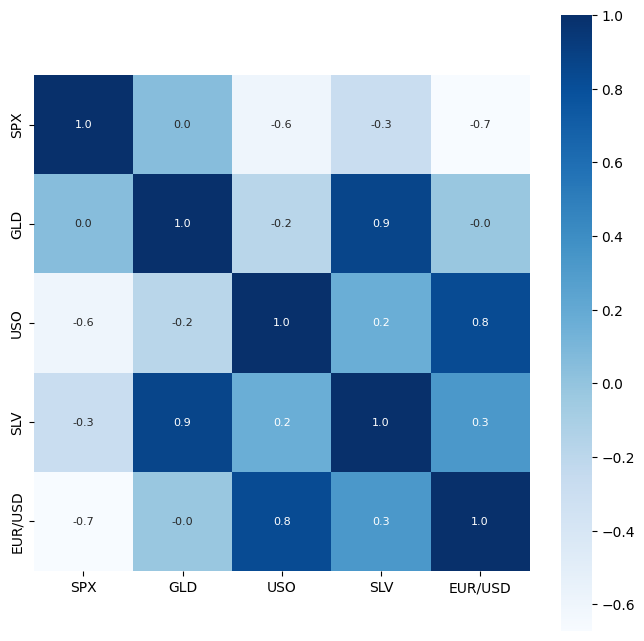

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',annot = True, annot_kws={'size':8}, cmap='Blues')

In [25]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


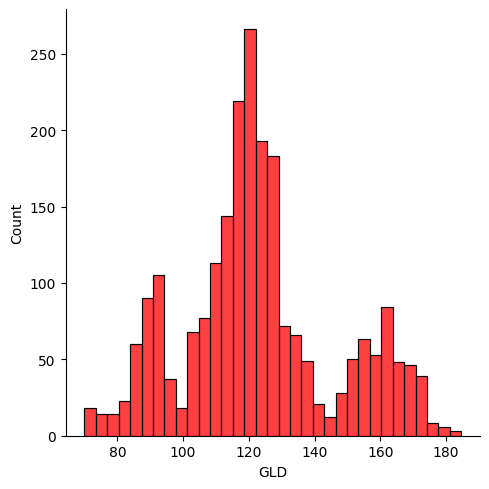

In [26]:
#checking the distribution of the gold price
sns.displot(gold_data['GLD'], color = 'Red')

### splitting the features and traget

In [27]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [32]:
#splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state=2) 

## Model Training : Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators = 100)

In [33]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model evaluation

In [34]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.45629915  82.02299989 116.07059996 127.62180059 120.7192006
 154.74149779 150.10789855 126.22630039 117.31029876 126.11620027
 116.74620102 172.38770097 141.39539905 167.62209864 115.09870006
 117.7016004  139.02230288 170.27460058 159.39040362 157.54399905
 155.15339985 125.61830026 175.94399943 157.53620332 125.32190022
  93.7983999   77.71569992 120.61049979 119.15479966 167.57199983
  88.01930063 125.40070006  91.30890096 117.60050045 121.13449897
 136.59050119 115.61720095 115.5287004  148.57519991 107.39120106
 104.03690236  87.26389788 126.43710096 117.80290032 154.45109941
 119.53700019 108.32510006 108.25039769  93.25740082 127.16449792
  74.97810008 113.72869927 121.38470001 111.30479913 119.03939887
 120.37189932 159.49720024 166.68310149 147.01839722  85.91719845
  94.31230058  86.80209882  90.49790009 119.0070007  126.40620031
 127.43209994 170.73549984 122.26899925 117.52319921  98.36140028
 168.46130179 142.96319924 132.31230252 121.18430246 121.3586993
 119.7183006

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9890850125907229


### compare the actual values and predicted values

In [37]:
Y_test =list(Y_test)

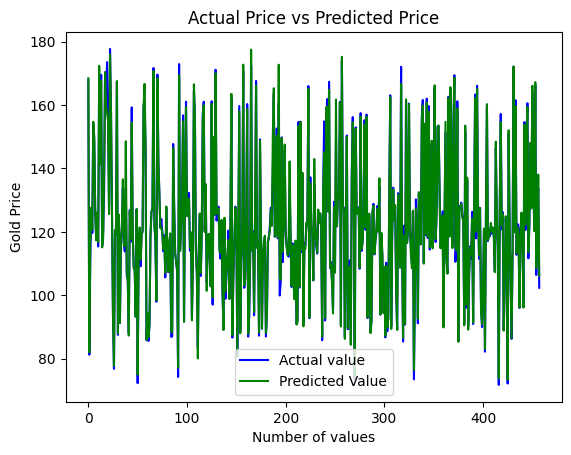

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(test_data_prediction, color ='green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()